##  Week6 복습과제
### 1. HR_employee_data 를 이용한 마찰("Attrition") 여부를 파악

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#### 1.1 문제와 같이 제시된 'HR_employee_data.csv'를 읽어와 HR에 저장하시오

In [2]:
HR=pd.read_csv("HR_employee_data.csv")

#### 1.2 HR 데이터의 상위 5 행을 통해 데이터를 파악하시오

In [3]:
HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### 1.3 HR 데이터를 describe()함수를 사용해서 의미 없어 보이는 값을 파악하시오.

In [4]:
HR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### 1.4 위 describe() 함수를 사용한 결과  'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours' 열이 의미가 없어 보입니다.
- HR 데이터 셋에서 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours' 열들을 삭제하시오. 

In [5]:
HR.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1 , inplace=True)

In [6]:
HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### 1.5 'Attrition'열에 어떤 값이 들어있는 지 알아보시오 (예측하고자 하는 y값이 될 열 입니다.)

In [7]:
HR['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

#### 1.6 HR 데이터의 'Attrition'열의 문자열 속성값을 1과 0의 값으로 바꾸시오.
- 'Yes'는 1로 'No'는0으로 

In [8]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

HR['Attrition'] = lb.fit_transform(HR['Attrition'])

In [9]:
HR['Attrition'].unique()

array([1, 0])

#### 1.7 HR 데이터를 correlation을 heatmap으로 나타내고 TotalWorkingYears와 상관성이 가장 높은 상위 3 변수를 적으시오. 

<AxesSubplot:>

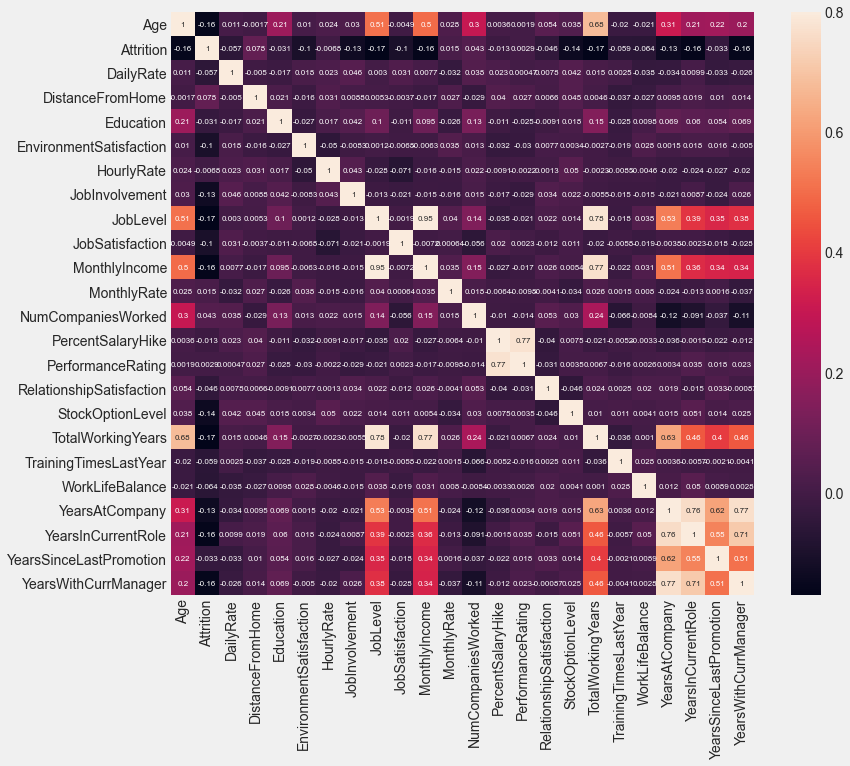

In [10]:
corrmat=HR.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8, square=True, annot=True, annot_kws={'size':8})

답 : age, monthly income, job level

#### 1.8 독립변수(X)와 종속변수(y) 분리 및 인코딩 
- y에 'Attrition' 열에 해당하는 값을, X에 나머지 변수들을 저장하시오.
- LabelEncdoer를 이용해 categorical 변수에 대해 인코딩을 하시오.
- X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.3, random_state=42)

In [11]:
# HR.info() -> 명목변수 확인
HR. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [12]:
HR['BusinessTravel'] = lb.fit_transform(HR['BusinessTravel'])
HR['Department'] = lb.fit_transform(HR['Department'])
HR['EducationField'] = lb.fit_transform(HR['EducationField'])
HR['Gender'] = lb.fit_transform(HR['Gender'])
HR['JobRole'] = lb.fit_transform(HR['JobRole'])
HR['MaritalStatus'] = lb.fit_transform(HR['MaritalStatus'])
HR['OverTime'] = lb.fit_transform(HR['OverTime'])

In [13]:
X= HR.drop('Attrition', axis = 1)
y= HR['Attrition']

In [14]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int32
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int32
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

#### 1.9 DecisionTreeClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오. 
- DecisionTreeClassifer 의 random_state=42

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf=tree.DecisionTreeClassifier(random_state=42)
clf=clf.fit(X_train,y_train)

clf_pred= clf.predict(X_test)
print(accuracy_score(y_test,clf_pred))

0.7777777777777778


#### 1.10 RandomForestClassifier를 사용해 훈련데이터를 fit 한 후, <br>테스트 셋으로 예측의 정확도를 구하고<br> 앞의 문제와 비교해 성능이 향상되었는 지 살펴보시오
- 조건 : Forest의 tree 개수를 100개로 제한하시오

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest= RandomForestClassifier(n_estimators=100)

forest.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
forest_pred=forest.predict(X_test)

print(accuracy_score(y_test,forest_pred))

0.8639455782312925


#### 1.11 결정트리를 기반으로 하는 AdaBoostClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오
-DecisionTreeClassifier의 max_depth=1, n_estimators=30,algorithm="SAMME.R",learning_rate=0.01

In [24]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier


ada_clf= AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30, algorithm="SAMME.R", learning_rate=0.01)

ada_clf.fit(X_train, y_train)


pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, pred))


0.8616780045351474


-위와 같은 조건으로 learning_rate=1일 때의 예측의 정확도를 구해 위의 결과와 비교하시오.

In [25]:
ada_clf_1= AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30, algorithm="SAMME.R", learning_rate=1)

ada_clf_1.fit(X_train, y_train)


pred = ada_clf_1.predict(X_test)
print(accuracy_score(y_test, pred))

0.8684807256235828


#### 1.12 GradientBoostingClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오
-max_depth=2, n_estimators=50, learning_rate=1.0, random_state=42

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier(max_depth=2, n_estimators=50, learning_rate=1.0, random_state=42)

model.fit(X_train, y_train)

pred=model.predict(X_test)
print(accuracy_score(y_test,pred))

0.873015873015873


#### 1.13 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으시오

```python
param_grid = {
    'n_estimators' : [30,40, 50, 70, 80, 90, 100],
    'learning_rate' : [0.1, 0.5, 1.0]
}
```

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [30,40, 50, 70, 80, 90, 100],
    'learning_rate' : [0.1, 0.5, 1.0]
}

grid_search=GridSearchCV(model, param_grid=params)
grid_search.fit(X,y)

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                  max_depth=2, n_estimators=50,
                                                  random_state=42),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [30, 40, 50, 70, 80, 90, 100]})

In [29]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

-GridSearchCV를 이용해 최적으로 학습된 estimators로 예측을 수행하시오

In [30]:
grad=GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1, random_state=42)

grad.fit(X_train, y_train)

pred=grad.predict(X_test)
print(accuracy_score(y_test,pred))

0.8707482993197279


#### 1.14 파이썬의 XGBClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오 
-use_label_encoder=False, eval_metric='mlogloss', random_state=42 

In [31]:
from xgboost import XGBClassifier


In [34]:
xgb=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb.fit(X_train,y_train)

pred=xgb.predict(X_test)
print(accuracy_score(y_test, pred))

0.8571428571428571


#### 1.15 LGBMClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오 
-random_state=42 

In [37]:
!pip install lightgbm

You should consider upgrading via the 'c:\users\jw00c\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [38]:
from lightgbm import LGBMClassifier

In [39]:
lgb=LGBMClassifier(random_state=42)

lgb.fit(X_train,y_train)

pred=lgb.predict(X_test)
print(accuracy_score(y_test, pred))

0.8707482993197279
